In [1]:
from Utils.split_dataset import save_devSet_valSet, scale_sets
from Utils.setupDataset import get_dataset, save, load
from Utils.feature_ranking import getRFE_ranking, getTopFeatures
from Utils.univariate_featureSelection import single_selection
from Utils.lasso_selections import get_LassoSelections
from Utils.stepwise_selection_SVM import featureSelectionResults_SVM
import numpy as np




m_set = get_dataset("Datasets/m_dataset.pickle")
w_set = get_dataset("Datasets/wiki_dataset.pickle")

md = m_set['data']

wt = w_set['target']
wd = w_set['data']

#save_devSet_valSet("Datasets/dataset.pickle", m_dev_file, m_val_file)
#save_devSet_valSet("Datasets/wiki_dataset.pickle", w_dev_file, w_val_file)

In [71]:
# only keep data with more than 2 words
indices = np.where(wd[:,10] > 2)
wwo_d = wd[indices[0]]
wwo_t = wt[indices[0]]
print len(wt), "and new minimum words", len(wwo_t)

# only keep data with maximum of 250 words
indices = np.where(wwo_d[:,10] <= 250)
wwo_d = wwo_d[indices[0]]
wwo_t = wwo_t[indices[0]]
print len(wt), "and new maximum words", len(wwo_t)

# only keep data with maximum of 25 sentences
indices = np.where(wwo_d[:,9] <= 25)
wwo_d = wwo_d[indices[0]]
wwo_t = wwo_t[indices[0]]
print len(wt), "and new maximum sentences ", len(wwo_t)

# only keep data with words with maximum word length of 100 chars
indices = np.where(wwo_d[:,12] <= 100)
wwo_d = wwo_d[indices[0]]
wwo_t = wwo_t[indices[0]]
print len(wt), "and new maximum word length ", len(wwo_t)

len(wwo_d)

6987 and new minimum words 6972
6987 and new maximum words 6672
6987 and new maximum sentences  6653
6987 and new maximum word length  6647


6647

In [74]:
cnt = np.where(wt == 0)
print "ok", len(cnt[0])
cnt = np.where(wt == 1)
print "aggressive", len(cnt[0])
print "after removal"
cnt = np.where(wwo_t == 0)
print "ok", len(cnt[0])
cnt = np.where(wwo_t == 1)
print "aggressive", len(cnt[0])

ok 3487
aggressive 3500
after removal
ok 3284
aggressive 3363


In [80]:
#save dataset into new pickle wiki_wo_dataset.pickle

wiki_wo_set = {"data": wwo_d, "target": wwo_t}
save(wiki_wo_set, "wiki_wo_dataset.pickle")

In [2]:
wo_dev_file = "Datasets/WO_DEV_dataset.pickle" 
wo_val_file = "Datasets/WO_VAL_dataset.pickle" 
#save_devSet_valSet("Datasets/wiki_wo_dataset.pickle", wo_dev_file, wo_val_file)

In [3]:
wo_dev = get_dataset(wo_dev_file)
wo_val = get_dataset(wo_val_file)

wo_sel_univ  = "Datasets/WO_SELECTIONS_univariate.csv"
#WO_RANKS = getTopFeatures(wo_dev, wo_sel_univ)

wo_sel_RFE   = "Datasets/WO_SELECTIONS_RFE.csv"
#WO_RFE = getRFE_ranking(wo_dev, wo_sel_RFE)

wo_sel_lasso = "Datasets/WO_SELECTIONS_lasso.pickle"
#wo_LASSO = get_LassoSelections(wo_dev, out=wo_sel_lasso)

In [4]:
from Utils.stepwise_selection_LR import get_LR_featureSelectionResults
WO_Results = get_LR_featureSelectionResults(wo_dev, wo_val, wo_sel_univ, wo_sel_RFE, wo_sel_lasso, out="Datasets/WOC10_MODEL_LR_results.csv")
WO_Results[:10]

,f1,precision,recall,accuracy,TN,FP,FN,TP,n,selection,source
0,0.885022,0.925878,0.847619,0.888621,764,57,128,712,66,"[56, 60, 40, 62, 24, 51, 61, 1, 13, 7, 19, 36,...",mi
1,0.884447,0.930355,0.842857,0.888621,768,53,132,708,56,"[56, 60, 40, 62, 24, 51, 61, 1, 13, 7, 19, 36,...",mi
2,0.884184,0.926893,0.845238,0.888019,765,56,130,710,65,"[56, 60, 40, 62, 24, 51, 61, 1, 13, 7, 19, 36,...",mi
3,0.884184,0.926893,0.845238,0.888019,765,56,130,710,62,"[56, 60, 40, 62, 24, 51, 61, 1, 13, 7, 19, 36,...",mi
4,0.884184,0.926893,0.845238,0.888019,765,56,130,710,63,"[56, 60, 40, 62, 24, 51, 61, 1, 13, 7, 19, 36,...",mi
5,0.884184,0.926893,0.845238,0.888019,765,56,130,710,64,"[56, 60, 40, 62, 24, 51, 61, 1, 13, 7, 19, 36,...",mi
6,0.884040,0.928010,0.844048,0.888019,766,55,131,709,58,"[60, 56, 40, 1, 62, 51, 24, 7, 12, 18, 19, 4, ...",combined
7,0.884013,0.933775,0.839286,0.888621,771,50,135,705,30,"[56, 60, 40, 62, 24, 51, 61, 1, 13, 7, 19, 36,...",mi
8,0.883750,0.930263,0.841667,0.888019,768,53,133,707,56,"[60, 56, 40, 1, 62, 51, 24, 7, 12, 18, 19, 4, ...",combined
9,0.883750,0.930263,0.841667,0.888019,768,53,133,707,57,"[60, 56, 40, 1, 62, 51, 24, 7, 12, 18, 19, 4, ...",combined


In [103]:
WO_Results[:10]

,f1,precision,recall,accuracy,TN,FP,FN,TP,n,selection,source
0,0.884978,0.937417,0.838095,0.889825,774,47,136,704,44,"[60, 40, 56, 1, 62, 24, 4, 7, 61, 51, 10, 0, 1...",f-test
1,0.884688,0.939759,0.835714,0.889825,776,45,138,702,38,"[60, 40, 56, 1, 62, 24, 4, 7, 61, 51, 10, 0, 1...",f-test
2,0.884567,0.935013,0.839286,0.889223,772,49,135,705,46,"[60, 40, 56, 1, 62, 24, 4, 7, 61, 51, 10, 0, 1...",f-test
3,0.884277,0.937333,0.836905,0.889223,774,47,137,703,45,"[60, 40, 56, 1, 62, 24, 4, 7, 61, 51, 10, 0, 1...",f-test
4,0.884277,0.937333,0.836905,0.889223,774,47,137,703,43,"[60, 40, 56, 1, 62, 24, 4, 7, 61, 51, 10, 0, 1...",f-test
5,0.884013,0.933775,0.839286,0.888621,771,50,135,705,50,"[60, 56, 40, 1, 62, 51, 24, 7, 12, 18, 19, 4, ...",combined
6,0.884013,0.933775,0.839286,0.888621,771,50,135,705,51,"[60, 56, 40, 1, 62, 51, 24, 7, 12, 18, 19, 4, ...",combined
7,0.883721,0.936085,0.836905,0.888621,773,48,137,703,44,"[60, 56, 40, 1, 62, 51, 24, 7, 12, 18, 19, 4, ...",combined
8,0.883575,0.937250,0.835714,0.888621,774,47,138,702,41,"[60, 40, 56, 1, 62, 24, 4, 7, 61, 51, 10, 0, 1...",f-test
9,0.883575,0.937250,0.835714,0.888621,774,47,138,702,39,"[60, 40, 56, 1, 62, 24, 4, 7, 61, 51, 10, 0, 1...",f-test


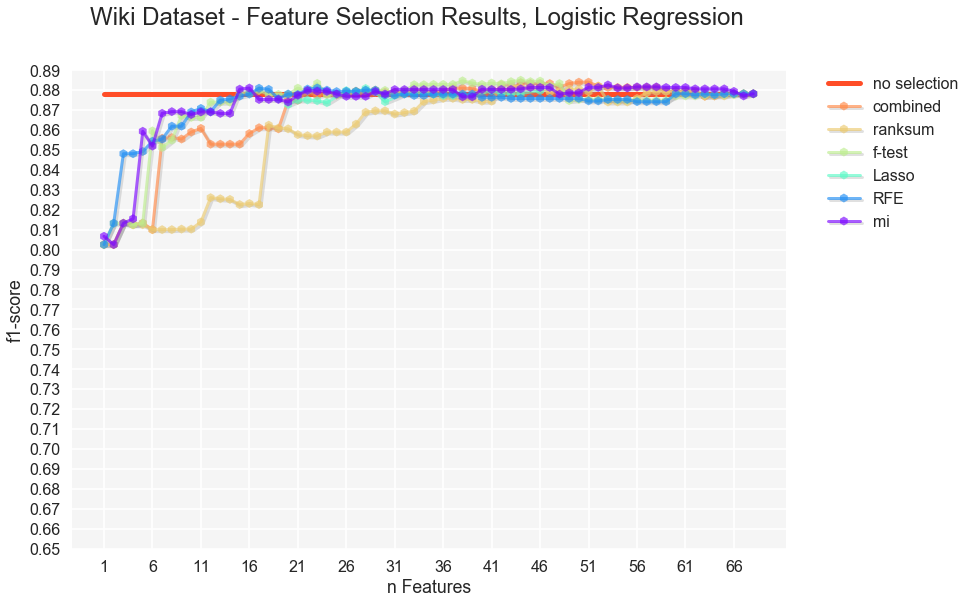

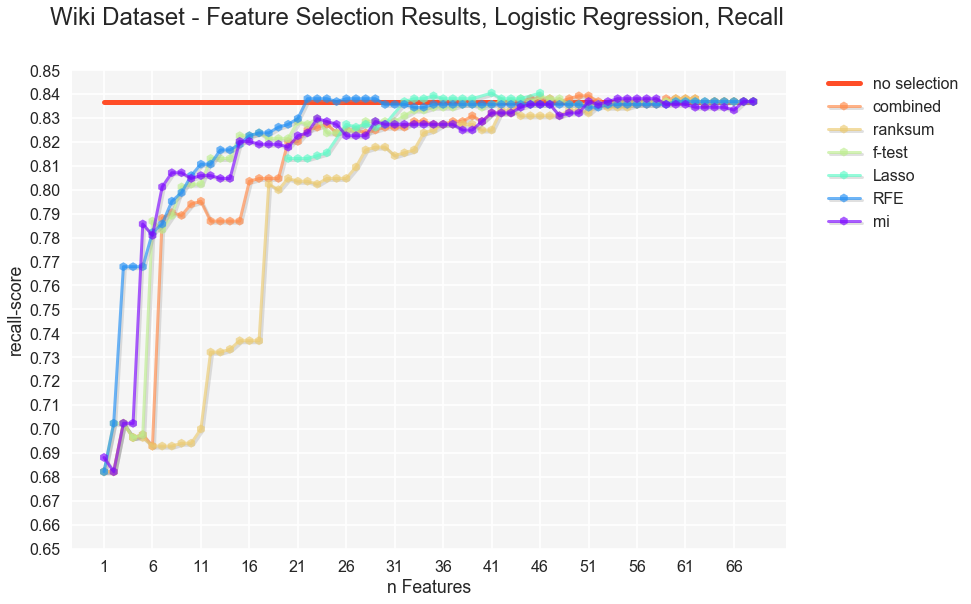

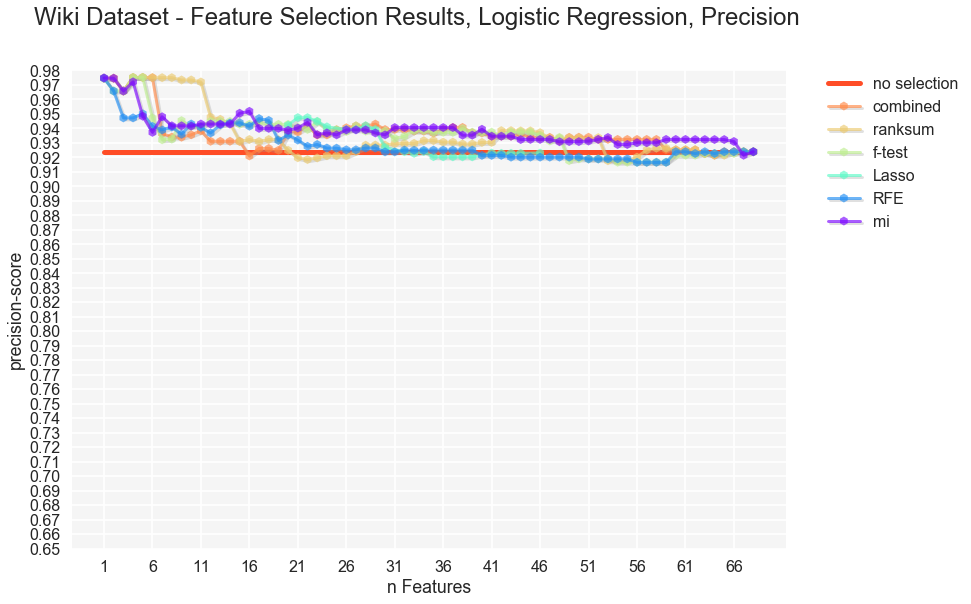

In [1]:
from Utils.plot_results import plot_results
import pandas as pd
df = pd.read_csv("Datasets/WO_MODEL_LR_results.csv", sep='\t', index_col=0)
plot_results(df, end=69,score="f1", title="Wiki Dataset - Feature Selection Results, Logistic Regression")

plot_results(df, score="recall", title="Wiki Dataset - Feature Selection Results, Logistic Regression, Recall")
plot_results(df, end=69, score="precision", title="Wiki Dataset - Feature Selection Results, Logistic Regression, Precision")


In [8]:
from Utils.stepwise_selection_SVM import featureSelectionResults_SVM
WO_linearSVM = featureSelectionResults_SVM(wo_dev, wo_val, wo_sel_univ, wo_sel_RFE, wo_sel_lasso, "Datasets/WO_MODEL_linearSVM_results.csv", rfb_kernel=False)

#plot_results(M_SVM, score="f1", title="Feature Selection Results, SVM")
WO_linearSVM[:10]

,f1,precision,recall,accuracy,TN,FP,FN,TP,n,selection,source,gamma,C
0,0.891041,0.906404,0.876190,0.891632,745.0,76.0,104.0,736.0,26,"[60, 40, 56, 1, 62, 24, 4, 7, 61, 51, 10, 0, 1...",f-test,0.0,200
1,0.890282,0.940397,0.845238,0.894642,776.0,45.0,130.0,710.0,27,"[60, 56, 40, 1, 62, 51, 24, 7, 12, 18, 19, 4, ...",combined,0.0,200
2,0.890123,0.924359,0.858333,0.892836,762.0,59.0,119.0,721.0,60,"[56, 60, 40, 62, 24, 51, 61, 1, 13, 7, 19, 36,...",mi,0.0,200
3,0.888060,0.929688,0.850000,0.891632,767.0,54.0,126.0,714.0,66,"[56, 60, 40, 62, 24, 51, 61, 1, 13, 7, 19, 36,...",mi,0.0,100
4,0.887640,0.933071,0.846429,0.891632,770.0,51.0,129.0,711.0,24,"[60, 40, 24, 56, 7, 51, 44, 45, 62, 61, 64, 23...",RFE,0.0,200
5,0.887515,0.922879,0.854762,0.890427,761.0,60.0,122.0,718.0,66,"[60, 56, 40, 1, 62, 51, 24, 7, 12, 18, 19, 4, ...",combined,0.0,100
6,0.887246,0.919540,0.857143,0.889825,758.0,63.0,120.0,720.0,62,"[56, 60, 40, 62, 24, 51, 61, 1, 13, 7, 19, 36,...",mi,0.0,200
7,0.887097,0.926166,0.851190,0.890427,764.0,57.0,125.0,715.0,43,"[56, 60, 40, 62, 24, 51, 61, 1, 13, 7, 19, 36,...",mi,0.0,200
8,0.886924,0.944818,0.835714,0.892234,780.0,41.0,138.0,702.0,21,"[60, 40, 24, 56, 7, 51, 44, 45, 62, 61, 64, 23...",RFE,0.0,200
9,0.886700,0.918367,0.857143,0.889223,757.0,64.0,120.0,720.0,57,"[60, 40, 24, 56, 7, 51, 44, 45, 62, 61, 64, 23...",RFE,0.0,100


In [5]:
WO_linearSVM[:20]

,f1,precision,recall,accuracy,TN,FP,FN,TP,n,selection,source,gamma,C
0,0.891960,0.944149,0.845238,0.896448,779.0,42.0,130.0,710.0,27,"[60, 56, 40, 1, 62, 51, 24, 7, 12, 18, 19, 4, ...",combined,0.0,200
1,0.891077,0.922293,0.861905,0.893438,760.0,61.0,116.0,724.0,28,"[60, 56, 40, 1, 62, 51, 24, 7, 12, 18, 19, 4, ...",combined,0.0,200
2,0.890683,0.931169,0.853571,0.894040,768.0,53.0,123.0,717.0,31,"[60, 40, 56, 1, 62, 24, 4, 7, 61, 51, 10, 0, 1...",f-test,0.0,100
3,0.888889,0.946237,0.838095,0.894040,781.0,40.0,136.0,704.0,32,"[60, 40, 56, 1, 62, 24, 4, 7, 61, 51, 10, 0, 1...",f-test,0.0,200
4,0.888752,0.924165,0.855952,0.891632,762.0,59.0,121.0,719.0,52,"[60, 56, 40, 1, 12, 51, 62, 13, 18, 19, 7, 33,...",ranksum,0.0,200
5,0.888214,0.906948,0.870238,0.889223,746.0,75.0,109.0,731.0,60,"[60, 56, 40, 1, 12, 51, 62, 13, 18, 19, 7, 33,...",ranksum,0.0,200
6,0.887787,0.926261,0.852381,0.891030,764.0,57.0,124.0,716.0,24,"[60, 40, 24, 56, 7, 51, 44, 45, 62, 61, 64, 23...",RFE,0.0,200
7,0.887531,0.912060,0.864286,0.889223,751.0,70.0,114.0,726.0,44,"[56, 60, 40, 62, 24, 51, 61, 1, 13, 7, 19, 36,...",mi,0.0,200
8,0.887523,0.917408,0.859524,0.889825,756.0,65.0,118.0,722.0,63,"[60, 40, 24, 56, 7, 51, 44, 45, 62, 61, 64, 23...",RFE,0.0,100
9,0.887508,0.928479,0.850000,0.891030,766.0,55.0,126.0,714.0,63,"[56, 60, 40, 62, 24, 51, 61, 1, 13, 7, 19, 36,...",mi,0.0,100


In [4]:
m_dev_file  = "Datasets/M_DEV_dataset.pickle"
m_val_file  = "Datasets/M_VAL_dataset.pickle"
m_sel_univ  = "Datasets/M_SELECTIONS_univariate.csv"
m_sel_RFE   = "Datasets/M_SELECTIONS_RFE.csv"
m_sel_lasso = "Datasets/M_SELECTIONS_lasso.pickle"
m_devSet = get_dataset(m_dev_file)
m_val = get_dataset(m_val_file)
M_SVM = featureSelectionResults_SVM(m_devSet, m_val, m_sel_univ, m_sel_RFE, m_sel_lasso, "Datasets/M_MODEL_linearSVM_results.csv", rfb_kernel=False)

#plot_results(M_SVM, score="f1", title="Feature Selection Results, SVM")
M_SVM[:50]

ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

In [4]:
M_SVM[:50]

,f1,precision,recall,accuracy,TN,FP,FN,TP,n,selection,source,gamma,C
0,0.827309,0.851240,0.804688,0.833333,112.0,18.0,25.0,103.0,17,"[10, 43, 56, 1, 40, 62, 61, 60, 24, 35, 63, 12...",mi,0.0,100.0
1,0.821705,0.815385,0.828125,0.821705,106.0,24.0,22.0,106.0,46,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test,0.0,100.0
2,0.821293,0.800000,0.843750,0.817829,103.0,27.0,20.0,108.0,19,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test,0.0,200.0
3,0.820717,0.837398,0.804688,0.825581,110.0,20.0,25.0,103.0,52,"[1, 43, 10, 35, 40, 11, 26, 56, 24, 62, 60, 59...",combined,0.0,20.0
4,0.820312,0.820312,0.820312,0.821705,107.0,23.0,23.0,105.0,22,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test,0.0,100.0
5,0.818898,0.825397,0.812500,0.821705,108.0,22.0,24.0,104.0,21,"[1, 43, 10, 35, 40, 11, 26, 56, 24, 62, 60, 59...",combined,0.0,200.0
6,0.818182,0.794118,0.843750,0.813953,102.0,28.0,20.0,108.0,47,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test,0.0,100.0
7,0.818182,0.794118,0.843750,0.813953,102.0,28.0,20.0,108.0,21,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test,0.0,100.0
8,0.817121,0.813953,0.820312,0.817829,106.0,24.0,23.0,105.0,18,"[40, 1, 59, 24, 46, 34, 54, 42, 61, 56, 58, 11...",RFE,0.0,200.0
9,0.817121,0.813953,0.820312,0.817829,106.0,24.0,23.0,105.0,53,"[1, 43, 10, 35, 40, 11, 26, 56, 24, 62, 60, 59...",combined,0.0,20.0
